In [9]:
import os

basepath = "."
graph_path = "./examples/heuristic-public"
cwd = os.getcwd() + "/"

def extract(algo, path, indexes, filename_func=None, history_line=-4, statistics_line=(-3, -2, -1), ok_no_lines=19, err_no_lines=2):
    algo_dir = os.path.join(path, algo)
    results = {'graphs':{}, 'errors': []}
    for i in indexes:
        filename = f'{algo}.{i}.out' if filename_func is None else filename_func(algo, i)
        algo_log_file = os.path.join(algo_dir, filename)
        result = {}
        with open(algo_log_file) as f:
            lines = f.readlines()
            if len(lines) == err_no_lines:
                results['errors'].append(i)
                continue
            elif len(lines) != ok_no_lines:
                raise ValueError(f'Unknown error when process graph: {i}')
            result['history'] = [float(r) for r in lines[history_line].split(',')]
            for j, key in enumerate(['max', 'avg', 'min']):
                # print(lines[statistics_line[j]])
                result[key] = float(lines[statistics_line[j]].split(': ')[1])
            results['graphs'][i] = result
    return results

In [10]:
config = {
  'GA-r': (15, (16, 17, 18), 19, 2),
  'SA-r': (15, (16, 17, 18), 19, 2),
  'RS-r': (15, (16, 17, 18), 19, 2),
  'GA-b': (15, (16, 17, 18), 19, 2),
  'SA-b': (15, (16, 17, 18), 19, 2),
  'GA-m': (15, (16, 17, 18), 19, 2),
  'SA-m': (15, (16, 17, 18), 19, 2),
  'SA-j': (15, (16, 17, 18), 19, 2),
}
data = {}
for k, v in config.items():
  res = extract(k, os.path.join(basepath, 'logs-all-graphs'), indexes=range(1, 100), ok_no_lines=19, err_no_lines=2)
  data[k] = res
for algo in config.keys():
  print(data[algo]['errors'])

[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]
[9, 10, 44, 46]


In [11]:
data2 = {}
for k, v in config.items():
  res = extract(k, os.path.join(basepath, 'logs-sampled-graphs'), 
    indexes=range(1, 31), 
    filename_func=lambda algo, i: f'{algo}2.{i}.out', 
    ok_no_lines=21,
  )
  data2[k] = res
for algo in config.keys():
  print(data2[algo]['errors'])

[]
[]
[]
[]
[]
[]
[]
[]


In [12]:
data3 = {}
algorithms = list(config.keys()) + ['ILP']
for k in algorithms:
  res = extract(k, os.path.join(basepath, 'logs-small-graph'), 
    indexes=range(1, 6), 
    ok_no_lines=19,
  )
  data3[k] = res
for algo in config.keys():
  print(data3[algo]['errors'])

[]
[]
[]
[]
[]
[]
[]
[]


[('51.gr', 1086, 2631), ('65.gr', 504, 763), ('34.gr', 1747, 13122), ('96.gr', 2097, 2161), ('86.gr', 884, 2700), ('24.gr', 1828, 5484), ('75.gr', 1989, 6024), ('41.gr', 4800, 19004), ('30.gr', 2657, 19875), ('61.gr', 801, 1696), ('92.gr', 522, 1705), ('55.gr', 1634, 3277), ('14.gr', 839, 15362), ('45.gr', 256, 2304), ('82.gr', 1667, 3313), ('71.gr', 6020, 20924), ('20.gr', 626, 1264), ('31.gr', 657, 1314), ('60.gr', 1472, 3028), ('93.gr', 773, 2389), ('54.gr', 1230, 2412), ('15.gr', 973, 30672), ('83.gr', 1731, 3466), ('70.gr', 8706, 30514), ('21.gr', 895, 1688), ('50.gr', 975, 2344), ('64.gr', 1535, 2146), ('35.gr', 2847, 21362), ('8.gr', 718, 1581), ('97.gr', 1110, 3431), ('87.gr', 989, 2630), ('25.gr', 6682, 20273), ('74.gr', 1543, 4610), ('40.gr', 2943, 11305), ('11.gr', 1483, 3723), ('3.gr', 1433, 2917), ('98.gr', 1719, 5182), ('7.gr', 5356, 10973), ('88.gr', 1184, 4051), ('99.gr', 9340, 18680), ('6.gr', 870, 1898), ('89.gr', 1537, 5157), ('2.gr', 10013, 20165), ('69.gr', 7532, 2

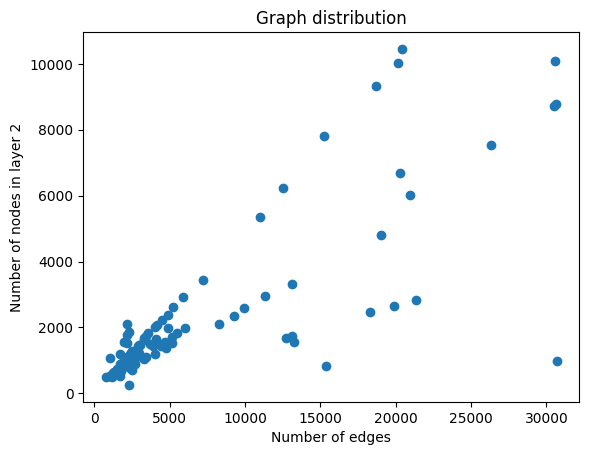

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def extract_graphs_meta(path, ignore=(9, 10, 44, 46, 100)):
  datapoint = []
  for file in os.listdir(path):
    if any([f'{i}.gr' == file for i in ignore]):
      continue
    filepath = os.path.join(path, file)
    with open(filepath) as f:
      first_line = f.readlines()[0]
      nodes, edges = first_line.split(' ')[3:]
      nodes = int(nodes)
      edges = int(edges)
      datapoint.append((file, nodes, edges))
  return datapoint


def visualize_graphs_size(path):
  graph_sizes = extract_graphs_meta(path)
  print(graph_sizes)
  x = np.array([size[2] for size in graph_sizes])
  y = np.array([size[1] for size in graph_sizes])

  plt.scatter(x, y)
  # for j, txt in enumerate(graph_sizes):
  #   plt.annotate(graph_sizes[j][0], (x[j], y[j]))
  plt.title("Graph distribution")
  plt.xlabel("Number of edges")
  plt.ylabel("Number of nodes in layer 2")
  plt.show()
visualize_graphs_size(graph_path)


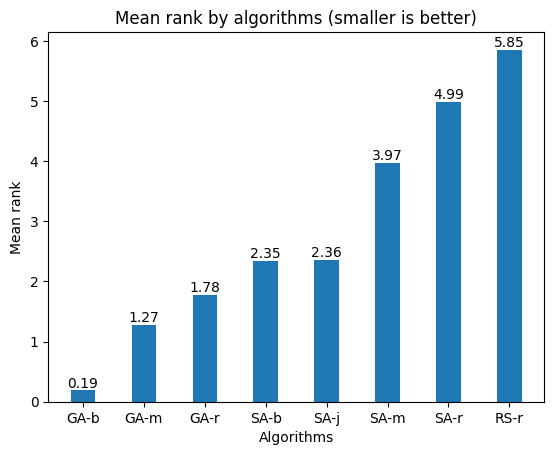

In [14]:
def rank_by_graph(results, ignore=(9, 10, 44, 46, 100)):
    for i in range(1, 100):
        if i in ignore:
            continue
        sorted_pairs = sorted(
            [
                (algo, result["graphs"][i]["avg"])
                for algo, result in results.items()
                if result["graphs"][i]["avg"] > 0
            ],
            key=lambda t: t[1],
        )
        rank = 0
        res = [(sorted_pairs[0][0], (rank, sorted_pairs[0][1]))]
        for j in range(1, len(sorted_pairs)):
          if sorted_pairs[j][1] > sorted_pairs[j-1][1]:
            rank += 1
          res.append((sorted_pairs[j][0], (rank, sorted_pairs[j][1])))
        yield (i, dict(res))

def mean_rank(graphs_data, algorithms=('GA-r', 'SA-r', 'GA-b', 'SA-b', 'GA-m', 'SA-m', 'SA-j', 'RS-r')):
  for algo in algorithms:
    sum_rank = 0
    length = 0
    for i, graph_data in graphs_data:
      if algo not in graph_data:
        continue
      sum_rank += graph_data[algo][0]
      length += 1
    m_rank = sum_rank / length
    yield (algo, m_rank)
      

mean_ranks = sorted(mean_rank(list(rank_by_graph(data))), key=lambda x: x[1])

def visualize_mean_ranks():
  x = [algo for algo, _ in mean_ranks]
  y = [rank for _, rank in mean_ranks]
  plt.bar(x, y, width = 0.4)
  for i, (_, rank) in enumerate(mean_ranks):
    plt.text(i, rank + 0.05, round(rank, 2), ha='center')
  
  plt.title('Mean rank by algorithms (smaller is better)')
  plt.xlabel("Algorithms")
  plt.ylabel("Mean rank")
  plt.show()


visualize_mean_ranks()

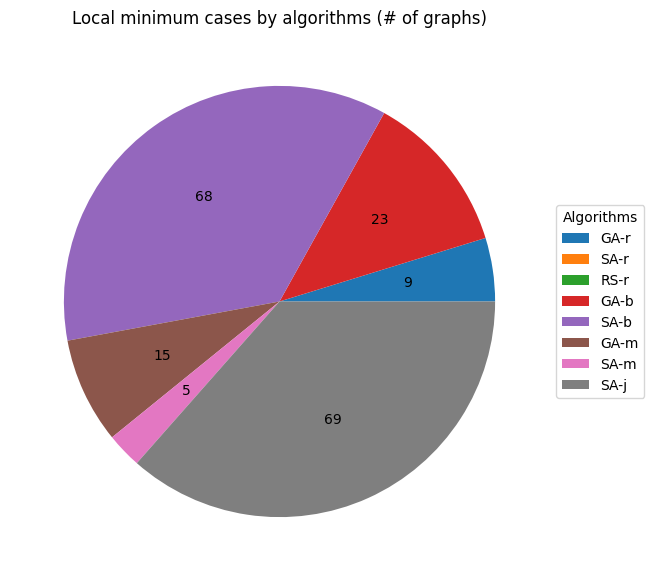

71.gr 2
15.gr 2
7.gr 2
2.gr 1
38.gr 0
95.gr 0


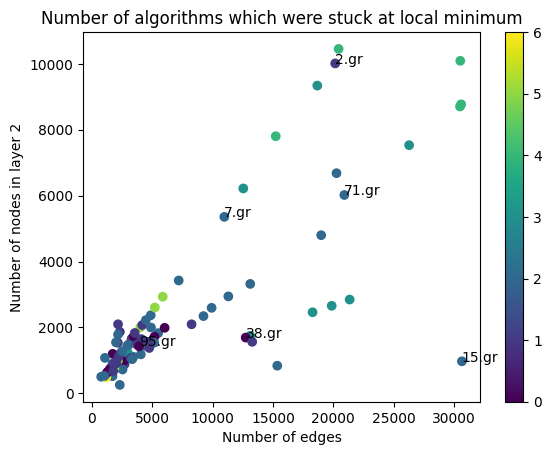

In [15]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


def get_stuck_graphs(results):
  res = {}
  for algo, result in results.items():
    graphs = sorted([i for i in range(1, 100) if i in result["graphs"] and result["graphs"][i]["avg"] == float(result["graphs"][i]["min"])])
    res[algo] = graphs
  return res

def visualize_stuck_graphs():
  res = get_stuck_graphs(data)
  
  # Creating dataset
  algorithms = res.keys()
  p = [len(res[algo]) for algo in algorithms]
  total = sum(p)

  # Creating plot
  fig = plt.figure(figsize=(10, 7))
  wedges, _, _ = plt.pie(p, autopct=lambda pct: int(np.round(pct/100.*total)) if pct > 0 else '')

  plt.title("Local minimum cases by algorithms (# of graphs)")
  plt.legend(wedges, algorithms,
          title="Algorithms",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
  # show plot
  plt.show()

def count_stuck_graphs():
  res = get_stuck_graphs(data)
  counts = [0 for _ in range(101)]
  for _, graphs in res.items():
    for graph in graphs:
      counts[graph] += 1
  return counts

def visualize_stuck_graphs_by_size(path):
  graph_sizes = extract_graphs_meta(path)
  counts = count_stuck_graphs()
  x = np.array([size[2] for size in graph_sizes])
  y = np.array([size[1] for size in graph_sizes])
  c = [counts[int(size[0].split('.')[0])] for size in graph_sizes]

  sc = plt.scatter(x, y, c=c, vmin=0, vmax=max(c))
  for j, _ in enumerate(graph_sizes):
    if int(graph_sizes[j][0].split('.')[0]) in [2, 7, 15, 38, 71, 95]:
      print(graph_sizes[j][0], counts[int(graph_sizes[j][0].split('.')[0])])
      plt.annotate(graph_sizes[j][0], (x[j], y[j]))
  
  plt.title("Number of algorithms which were stuck at local minimum")
  plt.xlabel("Number of edges")
  plt.ylabel("Number of nodes in layer 2")
  plt.colorbar(sc)
  plt.show()


visualize_stuck_graphs()
visualize_stuck_graphs_by_size(graph_path)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

def extract_lower_bounds(path):
  with open(path) as f:
    lines = f.readlines()
    for line in lines:
      graph, count = line.split(': ')
      yield int(graph), int(count)
    

lower_bounds = {graph: count for graph, count in extract_lower_bounds('./lower_bounds.txt')}

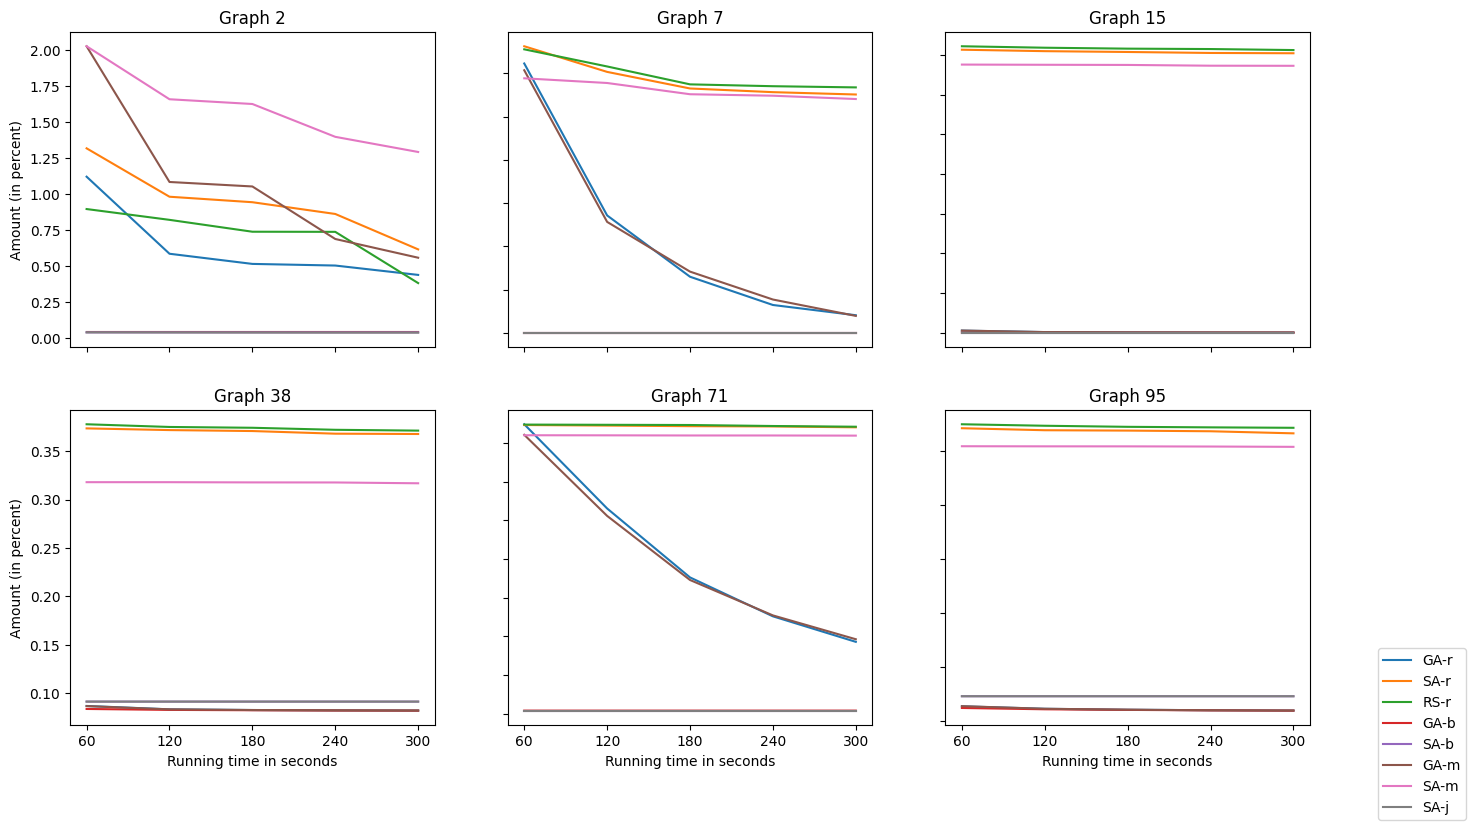

In [17]:
import matplotlib.pyplot as plt
import numpy as np

sample_graphs = (2, 7, 15, 38, 71, 95)
def get_cumulative_results(results, graphs=sample_graphs):
  cumulative_results = {}
  for algo in data2.keys():
    cumulative_results[algo] = {}
    for graph_index in range(len(sample_graphs)):
      cumulative_results[algo][graphs[graph_index]] = sorted([
        results[algo]['graphs'][graph_index + i * len(sample_graphs) + 1]['avg'] 
        for i in range(5)
      ], reverse=True)
  return cumulative_results

def visualize_cumulative_results(results, lower_bounds, algorithms=None):
  fig, axs = plt.subplots(2, 3,figsize=(16,9))
  for i in range(2):
    for j in range(3):
      graph_id = sample_graphs[3 * i + j]
      if not algorithms:
        algorithms = results.keys()
      for algo in algorithms:
        x = [i * 60 for i in range(1, 6)]
        y = [(v - lower_bounds[graph_id]) / lower_bounds[graph_id] for v in results[algo][graph_id]]
        axs[i, j].plot(x, y, label=algo)
        axs[i, j].set_title(f'Graph {graph_id}')
        axs[i, j].xaxis.set_major_locator(plt.MultipleLocator(60))

  ax = fig.axes[0] 
  line, label = ax.get_legend_handles_labels() 
  fig.legend(line, label, loc='outside lower right') 
  for ax in axs.flat:
    ax.set(xlabel='Running time in seconds', ylabel='Amount (in percent)')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
    ax.label_outer()
  # plt.legend()
  
visualize_cumulative_results(get_cumulative_results(data2), lower_bounds)

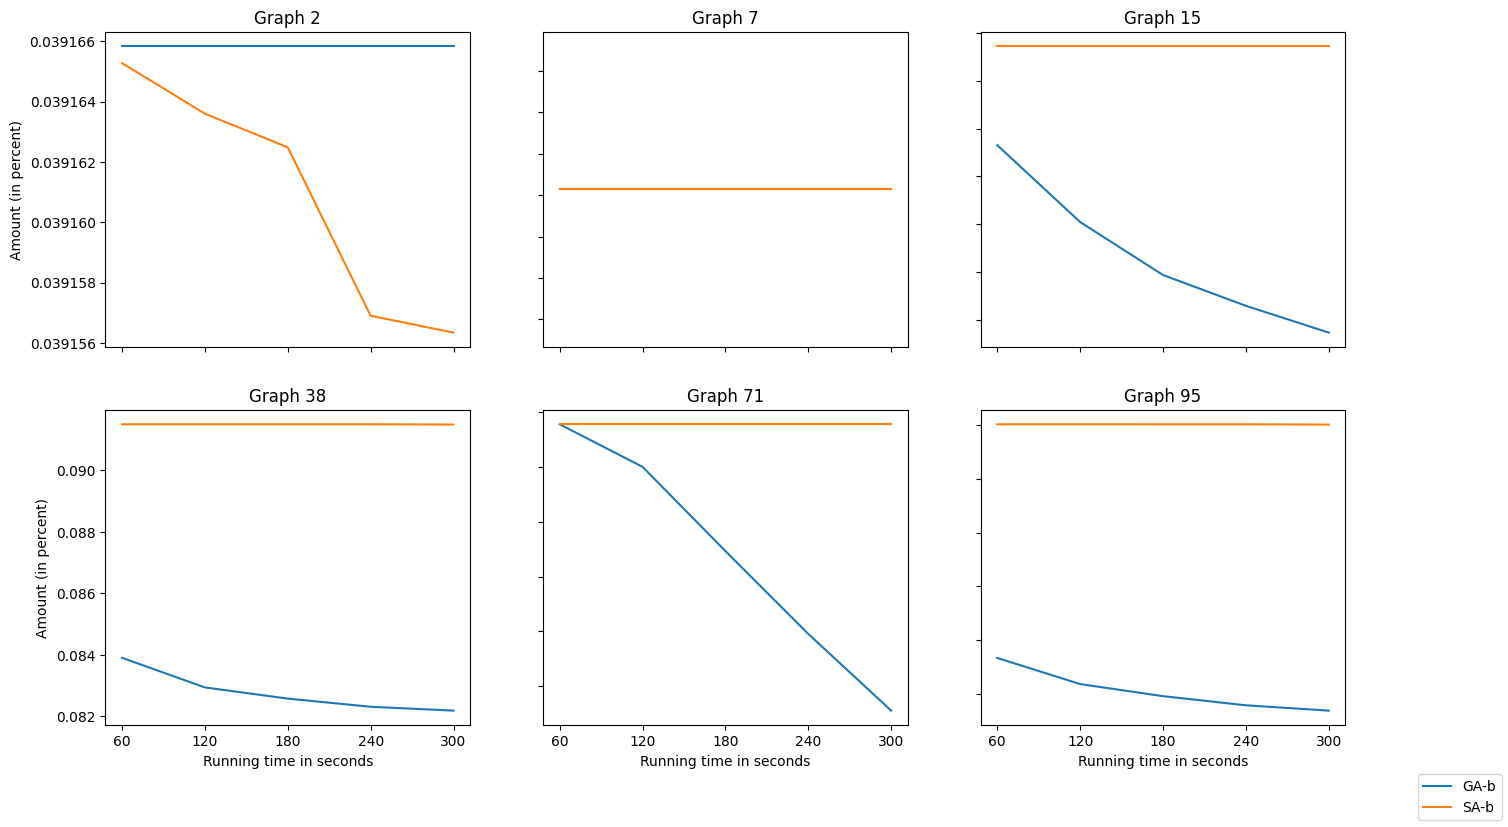

In [18]:
visualize_cumulative_results(get_cumulative_results(data2), lower_bounds, algorithms=['GA-b', 'SA-b'])

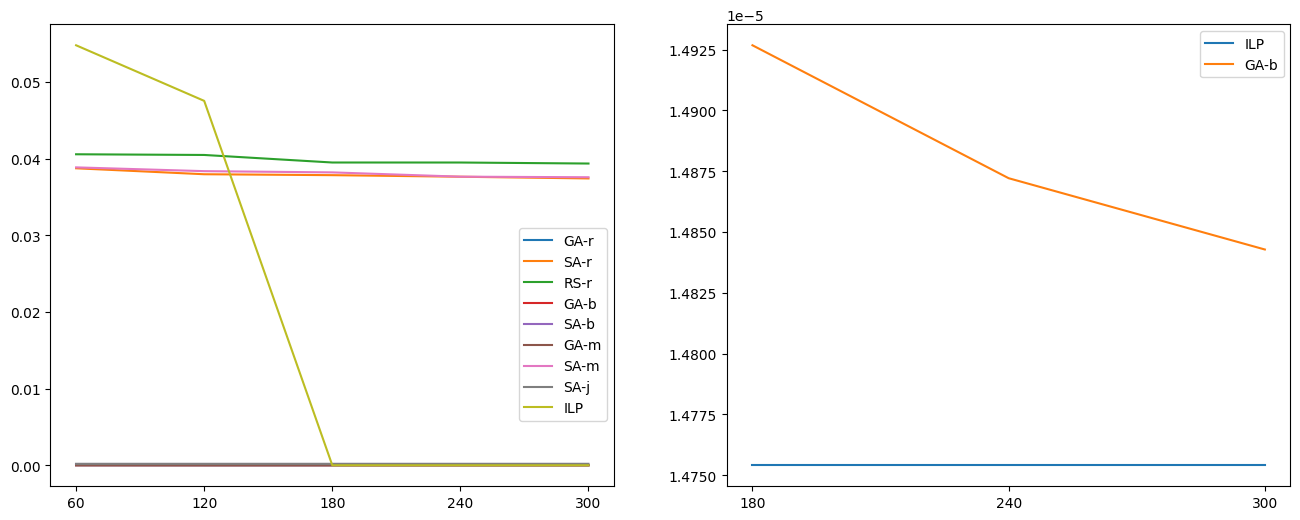

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def get_cumulative_results2(results):
  cumulative_results = {}
  for algo in results.keys():
    cumulative_results[algo] = sorted([
      results[algo]['graphs'][i]['avg'] 
      for i in range(1, 6)
    ], reverse=True)
  return cumulative_results

def visualize_cumulative_results2(results, lower_bounds, ax, loc='best', bbox_to_anchor=None, algorithms=None, clamp=None):
  if not algorithms:
    algorithms = results.keys()
  x = [i * 60 for i in range(1, 6)]
  if clamp is not None:
    x = [x[i] for i in range(clamp[0], clamp[1])]
  for algo in algorithms:
    y = [(v - lower_bounds) / lower_bounds for v in results[algo]]
    if clamp is not None:
      y = [y[i] for i in range(clamp[0], clamp[1])]
    ax.plot(x, y, label=algo)
  ax.set_xticks(x)
  ax.legend(loc=loc, bbox_to_anchor=bbox_to_anchor)
  

fig, axs = plt.subplots(1, 2, figsize=(16,6))
visualize_cumulative_results2(get_cumulative_results2(data3), 126202406, axs[0], loc='center right', bbox_to_anchor=(1., 0.35))
visualize_cumulative_results2(get_cumulative_results2(data3), 126202406, axs[1], algorithms=['ILP', 'GA-b'], clamp=[2, 5])
plt.show()